In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_excel('compiled_risk_data.xlsx')
data.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,0.0,0.0,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,0.0,1.0,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,0.0,1.0,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,0.0,1.0,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,0.0,0.0,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [ ]:
data.columns

Index(['project_name', 'Smart contract address', 'Blog post link',
       'Audit website', 'Chain', 'Is_closed_source', 'hidden_owner',
       'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax',
       'sell_tax', 'slippage_modifiable', 'Is_blacklisted',
       'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam',
       'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token',
       'illegal_unicode', 'exploitation', 'bad_contract',
       'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths',
       'Summary/rationale of risk tags marked true'],
      dtype='object')

In [ ]:
data_new = data.copy()
feature_1 = 'exploitation'
feature_2 = 'buy_tax'
feature_3 = 'sell_tax'
feature_4 = 'Is_closed_source'
feature_5 = 'Is_honeypot'
selected_features = data_new[[feature_1, feature_2, feature_3, feature_4, feature_5]].replace({True:1, False:0})
print("Features selected for clustering")
print(selected_features.head())


Features selected for clustering
   exploitation  buy_tax  sell_tax  Is_closed_source  Is_honeypot
0             1        0         0                 0            0
1             0        1         0                 0            0
2             1        0         0                 1            0
3             1        0         1                 1            1
4             1        0         0                 1            1


In [ ]:
from scipy.spatial.distance import pdist, squareform

distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)

In [ ]:
import scipy.cluster.hierarchy as sch

linkage_matrix = sch.linkage(distance_matrix, method='ward')

In [ ]:
linkage_matrix

array([[0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 6.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+00, 9.67000000e+02, 0.00000000e+00, 3.00000000e+00],
       ...,
       [1.81200000e+03, 1.92900000e+03, 3.86356555e+00, 1.48000000e+02],
       [1.85900000e+03, 1.93000000e+03, 1.07193202e+01, 5.07000000e+02],
       [1.92500000e+03, 1.93100000e+03, 2.02377602e+01, 9.67000000e+02]])

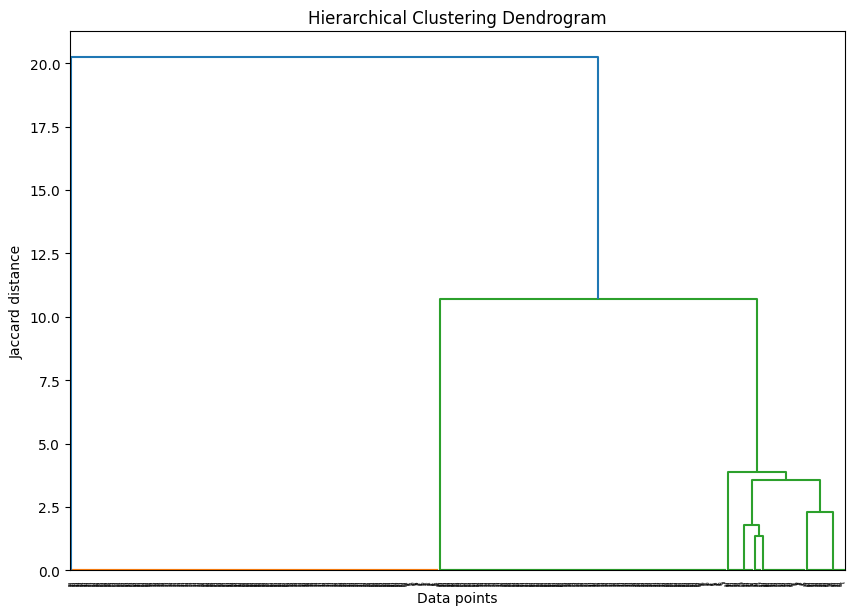

In [ ]:
# Plot the dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.xticks(fontsize=2)
plt.show()

In [ ]:
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')
data_new['cluster'] = cluster_labels
cluster_summary = data_new[[feature_1, feature_2, feature_3, feature_4, feature_5, 'cluster']].groupby(['cluster']).agg(['mean','std','median','count'])
cluster_summary

exploitation                          buy_tax                         \
                mean       std median count      mean       std median count   
cluster                                                                        
1           0.000000  0.000000    0.0   460  0.000000  0.000000    0.0   460   
2           1.000000  0.000000    1.0   359  0.000000  0.000000    0.0   359   
3           0.527027  0.500964    1.0   148  0.790541  0.408305    1.0   148   

         sell_tax                        Is_closed_source                   \
             mean       std median count             mean       std median   
cluster                                                                      
1        0.000000  0.000000    0.0   460         0.089130  0.285242    0.0   
2        0.000000  0.000000    0.0   359         0.091922  0.289319    0.0   
3        0.804054  0.398275    1.0   148         0.486486  0.501515    0.0   

              Is_honeypot                         
        count        mean       std median count  
cluster                                           
1         460    0.028261  0.165898    0.0   460  
2         359    0.041783  0.200372    0.0   359  
3         148    0.412162  0.493895    0.0   148

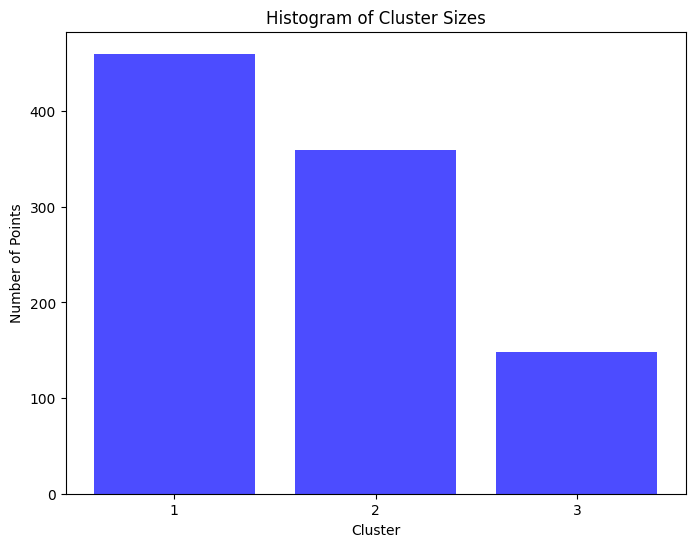

In [ ]:
# Plot histogram of cluster labels to see distribution of cluster sizes
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

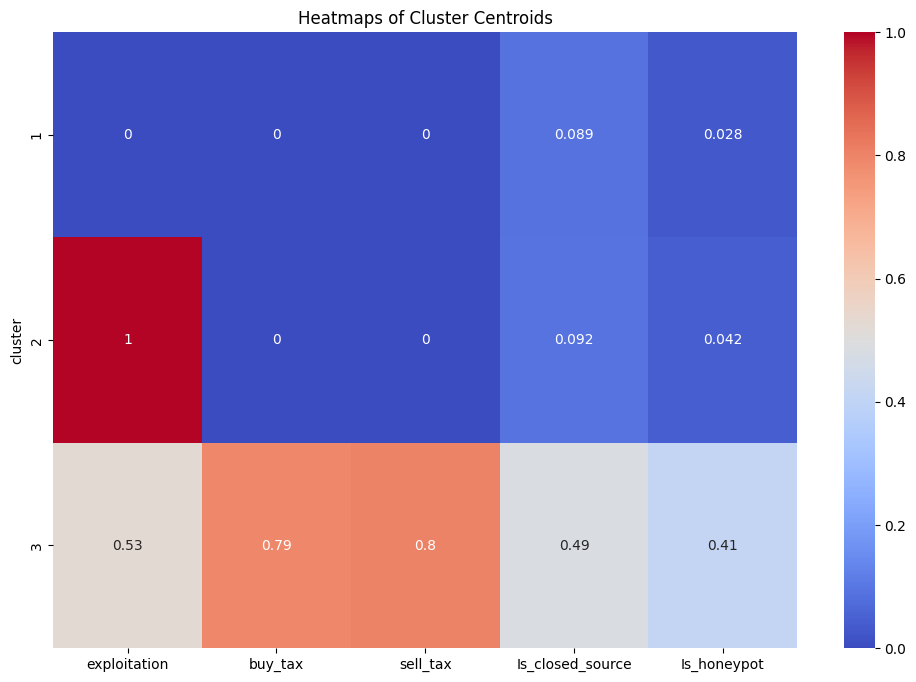

In [ ]:
cluster_center = data_new[[feature_1, feature_2, feature_3, feature_4, feature_5, 'cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_center, annot=True, cmap='coolwarm')
plt.title('Heatmaps of Cluster Centroids')
plt.show()